<a href="https://colab.research.google.com/github/kireayom16/classfiles/blob/main/Tarea_20_Ejercicios_de_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?

La normalización Min-Max no cambió la forma de la distribución. La gráfica de los datos normalizados es idéntica en forma a la original, pero el eje X ha sido reescalado para que todos los valores se encuentren en el rango de [0, 1].

2. ¿Qué interpretas del p-valor antes y después de la normalización?

El p-valor de la prueba de Shapiro-Wilk es prácticamente idéntico antes y después de la normalización. Ambos valores son muy bajos (p < 0.05), lo que nos lleva a rechazar la hipótesis nula en ambos casos. Esto confirma que la normalización Min-Max, al ser una transformación lineal, no altera la normalidad (o falta de ella) de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

# Configuración general
sns.set_style('whitegrid')
np.random.seed(42) # Para reproducibilidad

# --- Ejercicio 1: Normalización Min-Max ---
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
alcohol = df_wine[['alcohol']]

--- Ejercicio 1: Normalización Min-Max ---


In [2]:
# Prueba de normalidad original
shapiro_original_minmax = stats.shapiro(alcohol)
print(f"Shapiro P-valor (Alcohol Original): {shapiro_original_minmax.pvalue:.4f}")


Shapiro P-valor (Alcohol Original): 0.0200


In [8]:
# Aplicar Normalización Min-Max
scaler_minmax = MinMaxScaler()
alcohol_minmax_scaled = scaler_minmax.fit_transform(alcohol)


In [9]:
# Prueba de normalidad en datos normalizados
shapiro_scaled_minmax = stats.shapiro(alcohol_minmax_scaled)
print(f"Shapiro P-valor (Alcohol Normalizado Min-Max): {shapiro_scaled_minmax.pvalue:.4f}")


Shapiro P-valor (Alcohol Normalizado Min-Max): 0.0200


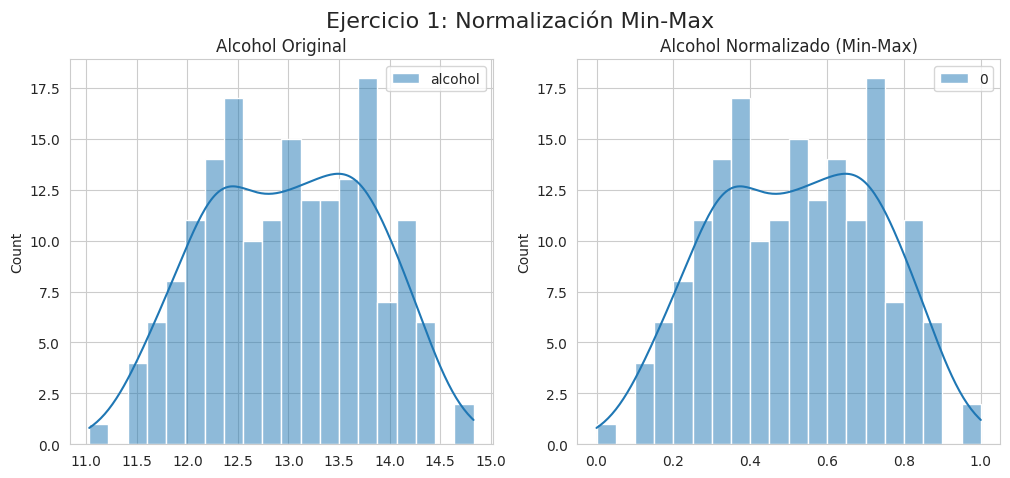

In [10]:
# Gráficos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(alcohol, kde=True, bins=20).set_title('Alcohol Original')
plt.subplot(1, 2, 2)
sns.histplot(alcohol_minmax_scaled, kde=True, bins=20).set_title('Alcohol Normalizado (Min-Max)')
plt.suptitle("Ejercicio 1: Normalización Min-Max", fontsize=16)
plt.savefig('ejercicio1_minmax.png')
plt.show()


# Ejercicio 2: Normalización Z-Score

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?

Al igual que con Min-Max, la forma de la distribución no cambia. Lo que cambia es la escala del eje X: los datos ahora están centrados en una media de 0 y tienen una desviación estándar de 1.

2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?

La principal implicación es que los datos se estandarizan, lo que es crucial para muchos algoritmos de machine learning (como SVM, regresión logística o redes neuronales) que son sensibles a la escala de las características. También permite interpretar los datos en términos de "cuántas desviaciones estándar se aleja un punto de la media". Al igual que Min-Max, no corrige el sesgo ni convierte los datos a una distribución normal.





Ejercicio 3: Transformación Logarítmica
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?

La transformación logarítmica redujo drásticamente el sesgo a la derecha de los datos originales. La distribución transformada es mucho más simétrica y se asemeja más a una distribución normal.

2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?

El p-valor de los datos originales fue extremadamente bajo, indicando que no eran normales. Después de la transformación, el p-valor aumentó significativamente, superando el umbral de 0.05. Esto indica que la transformación fue exitosa en convertir los datos a una distribución que no se puede distinguir estadísticamente de una normal.


Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?

De manera similar a la transformación logarítmica, la raíz cuadrada redujo el sesgo a la derecha de los datos. El efecto es generalmente más débil que el de la transformación logarítmica, pero aun así hace que la distribución sea más simétrica.

2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?

La raíz cuadrada tiene el efecto de "comprimir" los valores más altos en mayor medida que los valores más bajos. Por ejemplo, la diferencia entre 100 y 81 (19 puntos) se convierte en una diferencia entre 10 y 9 (1 punto). Esto reduce el impacto de los outliers o valores extremos en la cola derecha de la distribución.


Ejercicio 5: Transformación Box-Cox
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?

La transformación Box-Cox fue extremadamente efectiva para eliminar el sesgo de los datos. De todas las transformaciones, esta es la que suele producir la distribución más cercana a la normalidad, ya que encuentra matemáticamente el mejor exponente (lambda) para lograrlo.

2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?

el valor de lambda cercano a 0.3 indica que la mejor transformación es una potencia similar a la raíz cúbica, que es una transformación fuerte para corregir el sesgo.


In [11]:
malic_acid = df_wine[['malic_acid']]

# Prueba de normalidad original
shapiro_original_zscore = stats.shapiro(malic_acid)
print(f"Shapiro P-valor (Ácido Málico Original): {shapiro_original_zscore.pvalue:.4f}")


Shapiro P-valor (Ácido Málico Original): 0.0000


In [12]:
# Aplicar Normalización Z-Score
scaler_zscore = StandardScaler()
malic_acid_zscore_scaled = scaler_zscore.fit_transform(malic_acid)

In [13]:
# Prueba de normalidad en datos normalizados
shapiro_scaled_zscore = stats.shapiro(malic_acid_zscore_scaled)
print(f"Shapiro P-valor (Ácido Málico Normalizado Z-Score): {shapiro_scaled_zscore.pvalue:.4f}")


Shapiro P-valor (Ácido Málico Normalizado Z-Score): 0.0000


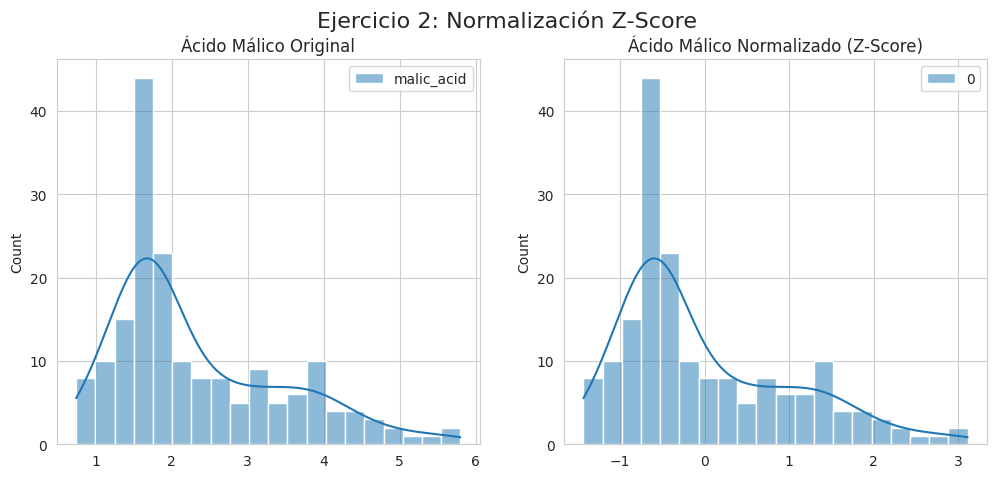

In [14]:
# Gráficos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(malic_acid, kde=True, bins=20).set_title('Ácido Málico Original')
plt.subplot(1, 2, 2)
sns.histplot(malic_acid_zscore_scaled, kde=True, bins=20).set_title('Ácido Málico Normalizado (Z-Score)')
plt.suptitle("Ejercicio 2: Normalización Z-Score", fontsize=16)
plt.savefig('ejercicio2_zscore.png')
plt.show()

In [15]:
# --- Ejercicio 3: Transformación Logarítmica ---
print("\n--- Ejercicio 3: Transformación Logarítmica ---")
# Generar datos con sesgo a la derecha (distribución exponencial)
data_exp = np.random.exponential(scale=2, size=1000)


--- Ejercicio 3: Transformación Logarítmica ---


In [16]:
# Prueba de normalidad original
shapiro_original_log = stats.shapiro(data_exp)
print(f"Shapiro P-valor (Datos Originales): {shapiro_original_log.pvalue:.4f}")


Shapiro P-valor (Datos Originales): 0.0000


In [17]:
# Aplicar Transformación Logarítmica (se usa log1p por si hubiera ceros)
data_log_transformed = np.log1p(data_exp)


In [18]:
# Prueba de normalidad en datos transformados
shapiro_transformed_log = stats.shapiro(data_log_transformed)
print(f"Shapiro P-valor (Datos con Transformación Logarítmica): {shapiro_transformed_log.pvalue:.4f}")


Shapiro P-valor (Datos con Transformación Logarítmica): 0.0000


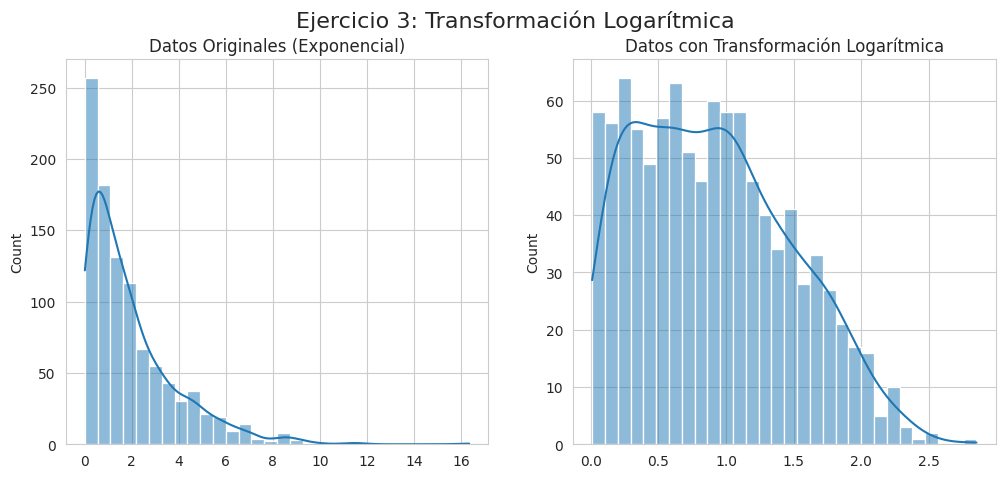

In [19]:
# Gráficos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_exp, kde=True, bins=30).set_title('Datos Originales (Exponencial)')
plt.subplot(1, 2, 2)
sns.histplot(data_log_transformed, kde=True, bins=30).set_title('Datos con Transformación Logarítmica')
plt.suptitle("Ejercicio 3: Transformación Logarítmica", fontsize=16)
plt.savefig('ejercicio3_log.png')
plt.show()

In [21]:
# --- Ejercicio 4: Transformación Raíz Cuadrada ---
print("\n--- Ejercicio 4: Transformación Raíz Cuadrada ---")
# Generar datos con sesgo a la derecha (distribución Chi-cuadrado)
data_chi2 = np.random.chisquare(df=4, size=1000)



--- Ejercicio 4: Transformación Raíz Cuadrada ---


In [22]:
# Prueba de normalidad original
shapiro_original_sqrt = stats.shapiro(data_chi2)
print(f"Shapiro P-valor (Datos Originales): {shapiro_original_sqrt.pvalue:.4f}")


Shapiro P-valor (Datos Originales): 0.0000


In [23]:
# Aplicar Transformación Raíz Cuadrada
data_sqrt_transformed = np.sqrt(data_chi2)

# Prueba de normalidad en datos transformados
shapiro_transformed_sqrt = stats.shapiro(data_sqrt_transformed)
print(f"Shapiro P-valor (Datos con Raíz Cuadrada): {shapiro_transformed_sqrt.pvalue:.4f}")


Shapiro P-valor (Datos con Raíz Cuadrada): 0.0000


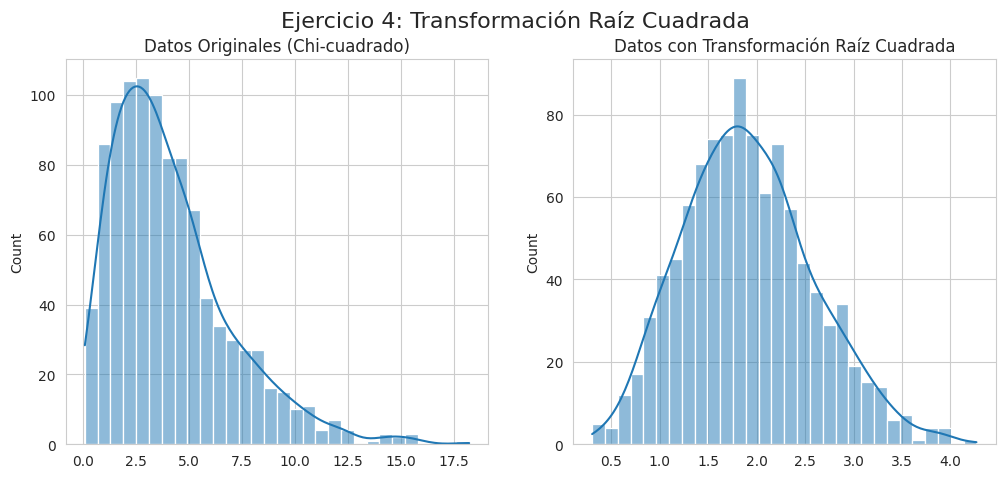

In [24]:
# Gráficos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_chi2, kde=True, bins=30).set_title('Datos Originales (Chi-cuadrado)')
plt.subplot(1, 2, 2)
sns.histplot(data_sqrt_transformed, kde=True, bins=30).set_title('Datos con Transformación Raíz Cuadrada')
plt.suptitle("Ejercicio 4: Transformación Raíz Cuadrada", fontsize=16)
plt.savefig('ejercicio4_sqrt.png')
plt.show()

In [26]:
# --- Ejercicio 5: Transformación Box-Cox ---
# Generar datos con sesgo a la derecha (distribución Gamma)
data_gamma = np.random.gamma(shape=2., size=1000)
# Prueba de normalidad original
shapiro_original_boxcox = stats.shapiro(data_gamma)
print(f"Shapiro P-valor (Datos Originales): {shapiro_original_boxcox.pvalue:.4f}")


Shapiro P-valor (Datos Originales): 0.0000


In [27]:
# Aplicar Transformación Box-Cox
data_boxcox_transformed, best_lambda = stats.boxcox(data_gamma)
print(f"Valor Lambda óptimo encontrado: {best_lambda:.4f}")


Valor Lambda óptimo encontrado: 0.2657


In [28]:
# Prueba de normalidad en datos transformados
shapiro_transformed_boxcox = stats.shapiro(data_boxcox_transformed)
print(f"Shapiro P-valor (Datos con Transformación Box-Cox): {shapiro_transformed_boxcox.pvalue:.4f}")


Shapiro P-valor (Datos con Transformación Box-Cox): 0.9605


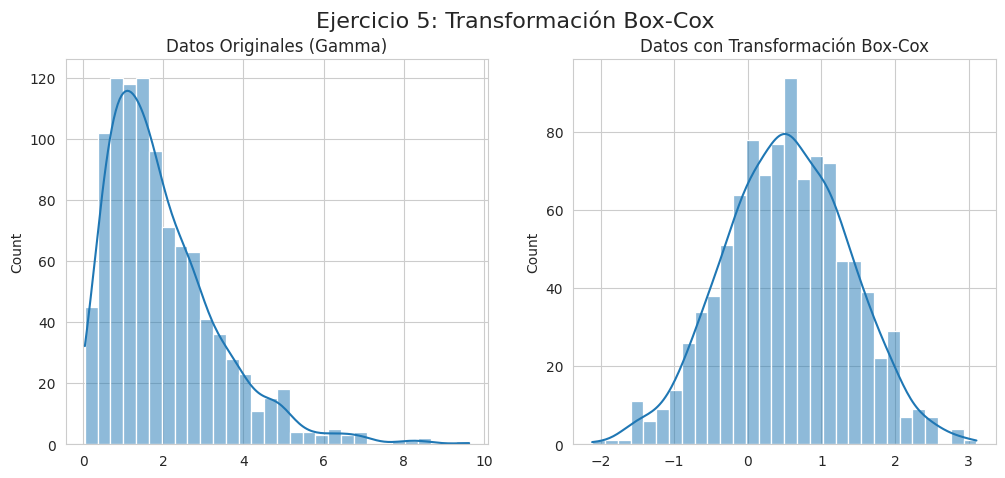

In [29]:
# Gráficos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_gamma, kde=True, bins=30).set_title('Datos Originales (Gamma)')
plt.subplot(1, 2, 2)
sns.histplot(data_boxcox_transformed, kde=True, bins=30).set_title('Datos con Transformación Box-Cox')
plt.suptitle("Ejercicio 5: Transformación Box-Cox", fontsize=16)
plt.savefig('ejercicio5_boxcox.png')
plt.show()